In [82]:
#!/usr/bin/env python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig_prefix = "../figures/2018-07-22-jw-weaselball-heatmap_"
data_prefix = "../data/2018-07-22-jw-weaselball-heatmap_"


The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


In [83]:
df = pd.read_csv('../data/2018-07-22-jw-weaselball_analysis_translation_matrix_out.csv')
print(df.shape)
df = df.apply(pd.to_numeric)
df.head()


(6300, 6300)


,0,1,2,3,4,5,6,7,8,9,...,6290,6291,6292,6293,6294,6295,6296,6297,6298,6299
0,0.071429,0.071429,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.071429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.066667,0.066667,0.066667,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.066667,0.066667,0.066667,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.066667,0.066667,0.066667,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.066667,0.066667,0.066667,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
df_import_m = pd.read_csv('../data/2018-07-22-jw-weaselball_analysis_magnitude_vector_out.csv',  header=None);
magnitude_V = df_import_m.iloc[:,0]
magnitude_V = magnitude_V.apply(pd.to_numeric)
magnitude_V = magnitude_V.astype(float)
magnitude_V.head()

0    14.0
1    15.0
2    15.0
3    15.0
4    15.0
Name: 0, dtype: float64

In [107]:
NUMBER_OF_SQUARES = 100 #This should be a square number to create equal sized squares.
RESOLUTION_OF_S1 = 0.1 #This is used to discretize the yaw angle over 0 - 2*pi

X_MAX = NUMBER_OF_SQUARES ** (1/2.0)
Y_MAX = NUMBER_OF_SQUARES ** (1/2.0)
YAW_MAX = (2 * np.pi) / RESOLUTION_OF_S1

def map1Dto3D(element):
    z = int(element / (X_MAX * Y_MAX));
    element -= int(z * X_MAX * Y_MAX)
    y = int(element / X_MAX)
    x = int(element % X_MAX)
    return ( x, y, z );
           
def map3Dto1D(x,y,yaw):
    return int((yaw*X_MAX*Y_MAX) + (y*X_MAX) + x)


In [108]:
print(map1Dto3D(map3Dto1D(5,5,2)))

(5, 5, 2)


In [109]:
#This isnt needed because of the hueristic
#This was previously used to estimate the size of the rows. Now we use the magnitude vector as replacement
#for index, row in df_regularized.iterrows():
#    multiplyer = 1.0/row.min() 
#    df_regularized.iloc[index] *= multiplyer
#df_regularized.head()

#Instead we now take the rows and multiply it by a scaler in the magnitude vector
df_regularized = df.copy()
for index,row in df_regularized.iterrows():
    multiplyer = magnitude_V.iloc[index]
    df_regularized.iloc[index] *= multiplyer
df_regularized.head()

,0,1,2,3,4,5,6,7,8,9,...,6290,6291,6292,6293,6294,6295,6296,6297,6298,6299
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
sumEvents = 0
for index,row in df_regularized.iterrows():
    sumEvents += row.sum()
print(magnitude_V.sum())
sumEvents


474863.0


474863.0

In [111]:
#Create heatmap of where structure is
heatmap_index = range(10)
size_of_rotation_series = int((2*np.pi)/RESOLUTION_OF_S1)

heatmap_rotation = pd.Series(0.0, index=range(size_of_rotation_series + 1))
heatmap = pd.DataFrame(0.0, index=range(10), columns=range(10))



In [112]:
#Fill in heatmap

for index, row in df_regularized.iterrows():
    coordinates_in_3d = map1Dto3D(index)
    total_states = row.sum()
    heatmap.at[coordinates_in_3d[0],coordinates_in_3d[1]] += total_states

    heatmap_rotation.at[coordinates_in_3d[2]] += total_states



In [113]:
#heatmap_rotation.head()

In [114]:
#I am not sure if this is neccessary. This tries to take out the +1 given to all events.
#Get the position heatmap have the lowest at 0
#import sys
#heatmap_without_n = heatmap.copy()

#minimum = sys.maxint
#for index, row in heatmap.iterrows():
#    minimum = min(minimum, row.min())
    
#print(minimum)
#for index, row in heatmap.iterrows():
#    heatmap_without_n.iloc[index] -= minimum
#heatmap_without_n.head()

In [115]:
#heatmap_rotation_without_n = heatmap_rotation.copy()
#minimum = heatmap_rotation_without_n.min()
#heatmap_rotation_without_n -= minimum
#heatmap_rotation_without_n.head()


,0,1,2,3,4,5,6,7,8,9
0,7.424165,7.427739,7.428927,7.428927,7.428927,7.432484,7.483244,7.447168,7.516433,7.595387
1,7.425358,7.428927,7.428927,7.429521,7.429521,8.063693,7.565275,7.543803,7.487734,7.538495
2,7.425358,7.428927,7.428927,7.436617,7.443078,7.578657,7.626570,7.983099,7.612337,7.450080
3,7.425358,7.661998,7.431892,7.589842,8.902320,9.045584,7.622664,8.530702,9.669599,7.876638
4,7.425358,7.963460,7.440734,7.954021,10.075548,10.014179,8.159661,9.567665,10.500041,7.735433
5,7.425358,7.429521,7.430114,7.630461,9.971567,9.579072,8.122668,9.493638,9.960529,7.529406
6,7.425358,7.428927,7.428927,7.428927,8.180601,7.596894,7.525640,8.417373,8.550048,7.428927
7,7.425358,7.428927,7.428927,7.430707,8.067463,7.583756,8.153062,9.559306,10.499242,7.548029
8,7.425358,7.428927,7.428927,7.428927,7.428927,7.483244,7.429521,9.569622,10.551350,7.444833
9,7.426549,7.428927,7.428927,7.428927,7.428927,7.428927,7.428927,7.428927,7.424762,7.420579


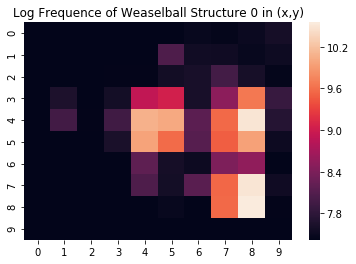

In [116]:
#Create graphic heatmap of position without n taken out
#Take the log of everything so it can be graphed, add 1 to get rid of log(0)
for index, row in heatmap.iterrows():
    heatmap.iloc[index] += 1
    heatmap.iloc[index] = np.log(heatmap.iloc[index])
heatmap_position = sns.heatmap(heatmap, annot=False).set_title('Log (Frequence of Weaselball Structure in (x,y) + 1)')
plot = heatmap_position.get_figure()
plot.savefig(fig_prefix + "position_heatmap0.png")
heatmap

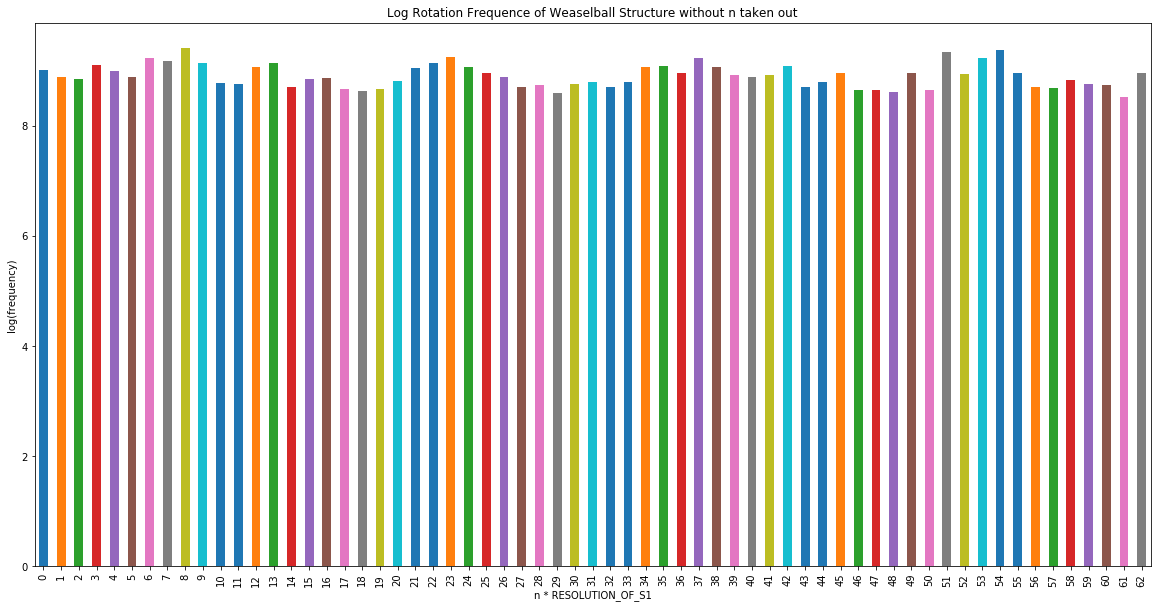

In [117]:
#Create graphic heatmap of rotation without n taken out
#Take the log of everything to it can be graphed better, add 1 to get rid of log(0)

heatmap_rotation += 1
heatmap_rotation = np.log(heatmap_rotation)
plt.figure(figsize=(20,10))
plt.title('Log (Rotation Frequence + 1) of Weaselball Structure')
plt.xlabel('n * RESOLUTION_OF_S1')
plt.ylabel('log(frequency)')
heatmap_rotation.plot.bar()
plt.savefig(fig_prefix + "rotation_heatmap.png")
plt.show()


In [ ]:
#Create graphic heatmap of rotation with n taken out
#Take the log of everything to it can be graphed better, add 1 to get rid of log(0)
#heatmap_rotation_without_n += 1
#heatmap_rotation_without_n = np.log(heatmap_rotation_without_n)
#plt.figure(figsize=(20,10))
#plt.title('Log Rotation Frequence of Weaselball Structure with n taken out')
#plt.xlabel('n * RESOLUTION_OF_S1')
#plt.ylabel('log(frequency)')
#heatmap_rotation_without_n.plot.bar()
#plt.savefig(fig_prefix + "rotation_heatmap_without_n.png")
#plt.show()



In [ ]:
#Create graphic heatmap of position with n taken out
#Take the log of everything so it can be graphed, add 1 to get rid of log(0)
#for index, row in heatmap_without_n.iterrows():
#    heatmap_without_n.iloc[index] += 1
#    heatmap_without_n.iloc[index] = np.log(heatmap_without_n.iloc[index])
#heatmap_position = sns.heatmap(heatmap_without_n, annot=False).set_title('Log Frequence of Weaselball Structure in (x,y) with n taken out')
#plot = heatmap_position.get_figure()
#plot.savefig(fig_prefix + "position_heatmap_without_n.png")
#heatmap_without_n